L’ACP (Analyse en Composantes Principales), appliquée à p variables quantitatives, a pour but de résumer les liens entre les variables par l'analyse des covariances ou des corrélations, et dresser une « carte » des individus indiquant leur position par rapport à ces liens.

Dans ce notebook, nous allons utiliser l’ACP à des fins exploratoires à l’aide du package Scikit
Learn : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Prenez bien le temps de vous approprier le cours fourni dans les ressources : "c-acp-afc-IUTSTID-sept2009.pdf"

In [1]:
import pandas as pd
from os import listdir
from matplotlib import rcParams
#rcParams['figure.figsize'] = 10, 10

# Récupération des données nationales

(Source des données : https://opendata.reseaux-energies.fr/pages/accueil/)

Dans un premier temps, nous récupérons à nouveau nos données au niveau national

In [2]:
def create_datetime_index(df):
    df['DateTime'] = pd.to_datetime(df['Date'].map(str) + ' ' + df['Heures'].map(str))
    df.drop(['Date', 'Heures'], axis=1, inplace=True)
    df.set_index('DateTime', inplace=True)
    return 

def read_rte_file(file_name):
    df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, header=None, skiprows=1, na_values='ND')
    df.drop(df.columns[-1], axis=1, inplace=True)
    df_titles = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, nrows=0)
    df.columns = df_titles.columns
    return df

In [3]:
DATA_FILE = 'data/data_rte/'

files = [f for f in listdir(DATA_FILE) if f.startswith('eCO2mix_RTE_Annuel-Definitif')]

df_all = []

for f in files:
    df = read_rte_file(DATA_FILE+f)
    df_all.append(df)
df_all = pd.concat(df_all)
df_all = df_all[(~df_all['Date'].isna())&(~df_all['Heures'].isna())]
create_datetime_index(df_all)
df_all.describe()

,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
count,122736.000000,245472.000000,245472.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,122736.000000,...,105167.000000,105167.000000,105167.000000,105167.000000,105167.000000,105167.000000,105167.000000,105167.000000,105167.000000,105167.000000
mean,54575.339884,54266.531111,54209.730051,339.186090,1255.001499,3038.899508,45553.978254,2315.777628,803.135396,7294.958113,...,23.374832,1200.814077,1761.703995,84.690977,4739.902289,1878.925110,689.723563,483.143885,239.306313,215.392557
std,12184.276144,12101.465252,12075.322930,308.492226,1222.213543,2387.018197,6766.979682,1855.206779,1230.482433,2792.407554,...,85.021415,996.651683,1753.279911,95.480201,1630.055521,1059.422759,767.623727,71.676538,70.504030,40.678588
min,29477.000000,28500.000000,0.000000,18.000000,0.000000,234.000000,26369.000000,21.000000,0.000000,1387.000000,...,0.000000,164.000000,0.000000,3.000000,1237.000000,47.000000,0.000000,229.000000,111.000000,111.000000
25%,45353.000000,45100.000000,45100.000000,160.000000,154.000000,775.000000,40399.000000,993.000000,0.000000,5167.000000,...,0.000000,362.000000,223.000000,47.000000,3341.000000,1066.000000,2.000000,434.000000,177.500000,179.000000
50%,52868.000000,52600.000000,52500.000000,279.000000,980.000000,2428.000000,44213.000000,1753.000000,11.000000,7136.000000,...,2.000000,468.000000,960.000000,66.000000,4895.000000,1722.000000,404.000000,486.000000,241.000000,214.000000
75%,62987.000000,62500.000000,62450.000000,449.000000,1969.000000,4626.000000,50818.000000,3099.000000,1331.000000,9259.250000,...,6.000000,2227.000000,3208.000000,85.000000,6075.000000,2513.000000,1163.000000,540.000000,282.000000,247.000000
max,102098.000000,101000.000000,102700.000000,5926.000000,6265.000000,9700.000000,61712.000000,12287.000000,6430.000000,17434.000000,...,651.000000,3396.000000,6006.000000,656.000000,8298.000000,6505.000000,4179.000000,702.000000,560.000000,399.000000


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245472 entries, 2012-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Périmètre                             245472 non-null  object 
 1   Nature                                245472 non-null  object 
 2   Consommation                          122736 non-null  float64
 3   Prévision J-1                         245472 non-null  float64
 4   Prévision J                           245472 non-null  float64
 5   Fioul                                 122736 non-null  float64
 6   Charbon                               122736 non-null  float64
 7   Gaz                                   122736 non-null  float64
 8   Nucléaire                             122736 non-null  float64
 9   Eolien                                122736 non-null  float64
 10  Solaire                           

In [5]:
df_all.head()

,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,France,Données définitives,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,3588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:15:00,France,Données définitives,NaN,57700.0,57550.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,France,Données définitives,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,3588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:45:00,France,Données définitives,NaN,56200.0,56000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,France,Données définitives,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,3536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Suppression des colonnes vides :

In [6]:
df_all = df_all.dropna(axis=1, how="all" )

# Préparation des données

Nous devons réaliser quelques étapes avant de pouvoir utiliser les données dans notre ACP :
- Supprimer les NA
- Sélectionner une année seulement (afin d'alléger notre ACP dans un premier temps)
- Ajouter des variables mois / saison afin de pouvoir visualiser de potentielles différences à ce niveau là
- Sélectionner les variables qui nous semblent les plus pertinentes (toujours dans le but d'alléger)
=> remarque : ce n'est pas parce qu'on garde plus de variable que notre analyse sera meilleure
- Standardisation des données afin de pouvoir réaliser l'ACP en comparant des choses comparables

Cette démarche vous est transmise à titre indicatif, à vous de voir si vous voulez pimenter les choses !

## Suppression des NA

In [7]:
df_all_ssna = df_all.dropna()

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245472 entries, 2012-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Périmètre                             245472 non-null  object 
 1   Nature                                245472 non-null  object 
 2   Consommation                          122736 non-null  float64
 3   Prévision J-1                         245472 non-null  float64
 4   Prévision J                           245472 non-null  float64
 5   Fioul                                 122736 non-null  float64
 6   Charbon                               122736 non-null  float64
 7   Gaz                                   122736 non-null  float64
 8   Nucléaire                             122736 non-null  float64
 9   Eolien                                122736 non-null  float64
 10  Solaire                           

## Sélection de l'année 2018 uniquement

<Axes: xlabel='DateTime'>

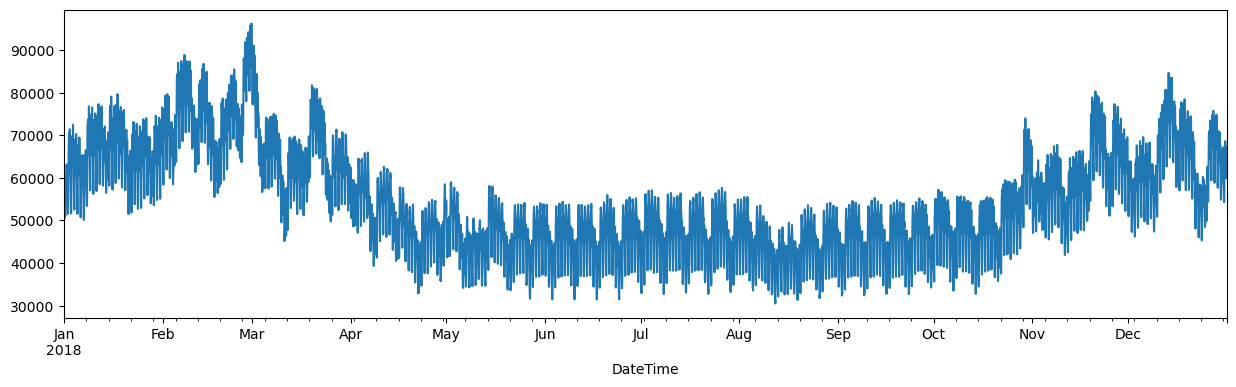

In [9]:
df_all_ssna["Consommation"].loc['2018'].plot(figsize=(15, 4))

In [10]:
df_all_ssna_2018 = df_all_ssna.loc['2018']
df_all_ssna_2018.shape

(17520, 34)

## Ajout des mois

In [11]:
df_all_ssna_2018.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='DateTime', length=17520)

In [12]:
df_all_ssna_2018["mois"] = df_all_ssna_2018.index.month

C:\Users\marie\AppData\Local\Temp\ipykernel_4232\538911738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_ssna_2018["mois"] = df_all_ssna_2018.index.month


## Ajout des saisons

In [13]:
df_all_ssna_2018["trimestre"] = df_all_ssna_2018.index.quarter

C:\Users\marie\AppData\Local\Temp\ipykernel_4232\658347835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_ssna_2018["trimestre"] = df_all_ssna_2018.index.quarter


In [14]:
df_all_ssna_2018.tail()

,Périmètre,Nature,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,mois,trimestre
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-12-31 21:30:00,France,Données définitives,60580.0,59300.0,59800.0,170.0,12.0,3825.0,55679.0,1406.0,...,1210.0,114.0,3860.0,789.0,0.0,556.0,314.0,295.0,12,4
2018-12-31 22:00:00,France,Données définitives,59901.0,58800.0,59400.0,146.0,11.0,3568.0,55404.0,1452.0,...,950.0,117.0,3818.0,815.0,0.0,556.0,314.0,296.0,12,4
2018-12-31 22:30:00,France,Données définitives,60939.0,60600.0,61100.0,146.0,11.0,3886.0,55186.0,1569.0,...,1269.0,118.0,3759.0,692.0,0.0,557.0,312.0,296.0,12,4
2018-12-31 23:00:00,France,Données définitives,63977.0,63500.0,64000.0,146.0,11.0,3910.0,55589.0,1537.0,...,1296.0,116.0,3716.0,1432.0,0.0,557.0,318.0,296.0,12,4
2018-12-31 23:30:00,France,Données définitives,63803.0,64000.0,64600.0,146.0,12.0,3452.0,55404.0,1543.0,...,863.0,115.0,3531.0,1157.0,0.0,557.0,316.0,293.0,12,4


## Conservation des énergies les plus présentes

In [15]:
# on ne garde que certaines colonnes
x_trim = df_all_ssna_2018[['Consommation','Fioul','Charbon','Gaz','Nucléaire','Eolien','Solaire','Hydraulique','trimestre']]
x_mois = df_all_ssna_2018[['Consommation','Fioul','Charbon','Gaz','Nucléaire','Eolien','Solaire','Hydraulique','mois']]

In [16]:
x_trim.shape

(17520, 9)

## Standardisation

In [17]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x_trim_stdsc = StandardScaler().fit_transform(x_trim)
x_mois_stdsc = StandardScaler().fit_transform(x_mois)

Remarque : c'est délicat de standardiser, les engeinvalues seront ok, mais les rotations des vecteurs dans 'le monde original' n'auront plus de sens

# ACP / PCA

## Exploration de l'ACP

Exploration de la PCA avec Scikit Learn : 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [18]:
from sklearn.decomposition import PCA

In [19]:
# n_c = x_stdsc.shape[1] # nb de composantes gardées
n_c = 9 # nb de composantes gardées

In [20]:
pca = PCA(n_components=n_c)

In [21]:
pca.fit(x_trim_stdsc)

PCA(n_components=9)

In [22]:
X_r = pca.fit(x_trim_stdsc).transform(x_trim_stdsc)

In [23]:
X_r

array([[ 0.41260819, -1.28011723,  2.57030902, ...,  0.33787913,
        -0.67402961,  0.48618448],
       [ 0.02667024, -1.44121441,  2.37704179, ...,  0.04589477,
        -1.08899254,  0.59694484],
       [-0.2098805 , -1.3521132 ,  2.32587296, ...,  0.10125443,
        -1.22373596,  0.58112178],
       ...,
       [ 0.08788173,  1.08172672,  1.09352922, ..., -0.09800319,
         0.5002511 ,  0.33453749],
       [ 0.29734604,  0.93759152,  1.0542172 , ..., -0.26655168,
         0.51453099,  0.45791254],
       [ 0.15815456,  0.97289541,  1.09031032, ..., -0.18155051,
         0.63517915,  0.55705085]])

### Exploration des différentes sorties de l'ACP

In [24]:
#print(pca.components_)

In [25]:
print(pca.explained_variance_)

[3.57981408 1.68058089 1.29290474 0.84929582 0.64242121 0.46521672
 0.28894954 0.15881735 0.04251338]


Les variances des composantes principales sont appelées valeurs propres, ce sont les variances expliquées par chacun des axes

Une des règles pour choisir le nombre de composantes qu'on conserve pour notre analyse est la règle de Kaizer : elle consiste à retenir les axes pour lesquels les valeurs propres sont supérieures à 1 (1 étant la moyenne de l'ensemble des valeurs propres). Ici on garderait donc les 3 premiers axes.

In [26]:
pca.explained_variance_.mean()

1.0000570808836118

In [27]:
print(round(pca.explained_variance_ratio_.sum(),3)*100)

100.0


Variance totale expliquée par les axes : on a bien 100% de l'information représentée par l'ensemble des axes

In [28]:
print(pca.explained_variance_ratio_)

[0.39773442 0.18672055 0.14364788 0.09436082 0.07137606 0.0516878
 0.03210367 0.01764537 0.00472344]


In [29]:
print(pca.explained_variance_ratio_.cumsum()*100)

[ 39.77344168  58.44549684  72.81028513  82.24636677  89.38397277
  94.55275244  97.76311958  99.52765609 100.        ]


Variance expliquée cumulée au fil des axes : l'idée dans une ACP est de garder un minimum d'axe tout en gardant un maximum d'information ; de variabilité des données, dans le jeu de données final qu'on va garder

L'idéal est d'avoir au moins 70% de l'information conservée : on garderait donc ici les 3 premiers axes

In [30]:
print(pca.n_features_) # nombre de features / variables mises dans l'ACP

9


E:\programmes - 01 - data\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print(pca.n_samples_) # nombre d'individus / d'observations mises dans l'ACP

17520


## Réalisation d'une ACP complète avec les graphiques (trimestres)

### Réalisation de l'ACP

In [32]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#chargement données
X = x_trim

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]
print(p, "variables mises dans l'ACP")

#acp
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x_trim_stdsc)
print("Valeurs propres des axes : ")
print(pd.DataFrame(np.round(acp.explained_variance_,2)).head(10))

# % de variance expliquée pour chacun des axes
acp.explained_variance_ratio_*100

9 variables mises dans l'ACP
Valeurs propres des axes : 
      0
0  3.58
1  1.68
2  1.29
3  0.85
4  0.64
5  0.47
6  0.29
7  0.16
8  0.04


array([39.77344168, 18.67205515, 14.3647883 ,  9.43608164,  7.137606  ,
        5.16877967,  3.21036714,  1.76453652,  0.47234391])

On garde donc 3 axes à explorer

### Eboulis des valeurs propres

Text(0, 0.5, '% de variance expliquée')

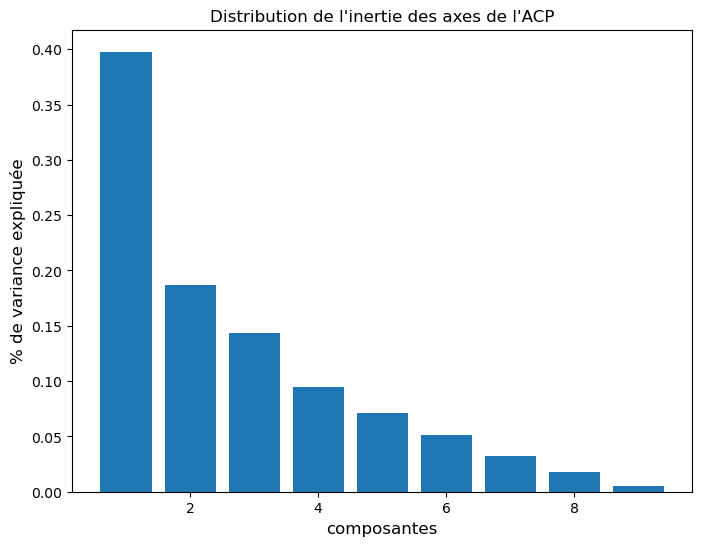

In [33]:
import matplotlib.pyplot as plt

# ébouli des valeurs propres ?
fig, ax = plt.subplots(figsize = (8, 6))
rects = ax.bar(range(1,10),acp.explained_variance_ratio_) # range(1,n_variables+1)

ax.set(title='Distribution de l\'inertie des axes de l\'ACP')
ax.set_xlabel("composantes", size=12)
ax.set_ylabel("% de variance expliquée", size=12)

Pour le choix du nombre d'axes à conserver on peut :
- Choisir un nombre de composantes qui conserve un certain % de la variance (>70 par exemple) => 3 axes
- Soit utiliser la règle du coude : ici ce n'est pas flagrant

### Cercle de corrélation des variables et nuage des individus / des observations

https://stackoverflow.com/questions/62179937/build-a-correlation-circle-with-python-error-valueerror-could-not-broadcast-i

Ici on pourra jouer avec les différents axes choisi en paramètres : 1 vs 2 ; 1 vs 3 ; 2 vs 3

C:\Users\marie\AppData\Local\Temp\ipykernel_4232\3562246856.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


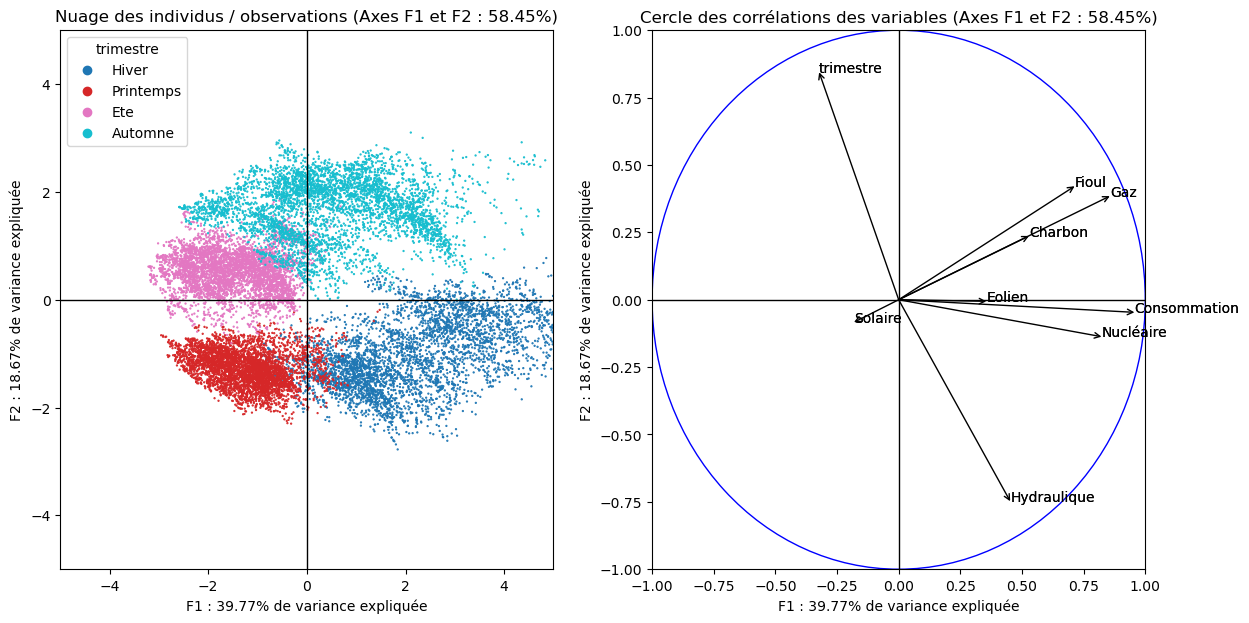

In [34]:
### AXE 1 vs AXE 2

# Paramètres avec lesquels jouer :
axe1 = 1
axe2 = 2

fig = plt.subplots(figsize=(14,7))

ax1 = plt.subplot(121)

# taille figure
# fig, ax = plt.subplots(figsize=(7,7))
ax1.set_xlim(-5,5) #même limites en abscisse
ax1.set_ylim(-5,5) #et en ordonnée

trimestre_names = ['Hiver', 'Printemps', 'Ete', 'Automne']

# nuage de points des individus / observations
scatter = plt.scatter(coord[:,axe1-1],coord[:,axe2-1], c=X.trimestre, cmap='tab10', s=0.4)

# noms des axes et de la figure
ax1.set_title(f"Nuage des individus / observations (Axes F{axe1} et F{axe2} : {round((acp.explained_variance_ratio_[axe1-1]+acp.explained_variance_ratio_[axe2-1])*100,2)}%)", size=12)
ax1.set_xlabel(f"F{axe1} : {round(acp.explained_variance_ratio_[axe1-1]*100,2)}% de variance expliquée", size=10)
ax1.set_ylabel(f"F{axe2} : {round(acp.explained_variance_ratio_[axe2-1]*100,2)}% de variance expliquée", size=10)

#ajouter les axes # a preciser
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)

plt.legend(handles=scatter.legend_elements()[0], 
           labels=trimestre_names,
           title="trimestre")

ax2 = plt.subplot(122)

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(acp.explained_variance_)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))

for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#cercle des corrélations
# Axes 1/3
#fig, ax = plt.subplots(figsize=(8,8))
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,axe1-1],corvar[j,axe2-1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)

# noms des axes et de la figure
ax2.set_title(f"Cercle des corrélations des variables (Axes F{axe1} et F{axe2} : {round((acp.explained_variance_ratio_[axe1-1]+acp.explained_variance_ratio_[axe2-1])*100,2)}%)", size=12)
ax2.set_xlabel(f"F{axe1} : {round(acp.explained_variance_ratio_[axe1-1]*100,2)}% de variance expliquée", size=10)
ax2.set_ylabel(f"F{axe2} : {round(acp.explained_variance_ratio_[axe2-1]*100,2)}% de variance expliquée", size=10)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
ax2.add_artist(cercle) 

# affichage des étiquettes (noms des variables)
from matplotlib.patches import ConnectionPatch

for j in range(p):
    plt.annotate(X.columns[j], (corvar[j, axe1-1], corvar[j, axe2-1]))
    arr = ConnectionPatch((0,0),(corvar[j, axe1-1], corvar[j, axe2-1]),
        coordsA = "data", coordsB = "data",arrowstyle="->")
    ax2.add_artist(arr)

#affichage
plt.show()

**Exemple d'interprétation : avec les trimestres, axe 1 vs axe 2**

Cercle de corrélations des variables :
- Les variables où la pointe de la flèche est le plus proche du cercle sont les plus significatives. Par exemple ici le solaire est mal représenté par les axes de l'ACP, on ne pourra pas tirer de conclusion sur cette variable. Tandis que la consommation est très bien représentée par le 1er axe.
- L'axe 1 est un axe d'échelle qui ordonne les observations selon leur importance pour les valeurs de consommation, nucléaire, charbon, gaz et fioul. Ces variables sont liées entre elles : cela confirme ce qu'on a pu observer précédemment. Plus les flèches sont proches, plus les variables sont corrélées entre elles.
- L'axe 2 concerne principalement les trimestres

Nuage des individus / observations :
- On remarque que les saisons sont bien représentées sur les axes : les points bleu forment des groupes bien distincts : cela montre que la saison à un rôle dans ma façon de consommer et de produire
- Les nuages de points de l'hiver et de l'automne sont plus vers la droite, vers la consommation : on consomme plus à ce moment là

**Exemple d'interprétation : avec les trimestres, axe 2 vs axe 3**

Cercle de corrélations des variables :
- L'éolien et le solaire s'opposent sur l'axe 3

Nuage des individus / observations :
- On voit beaucoup mieux le découpage des trimestres sur l'axe 2 ici

## Réalisation d'une ACP complète avec les graphiques (mois)

In [35]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#chargement données
X = x_mois

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]
#print(p, "variables mises dans l'ACP")

#acp
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x_mois_stdsc)
print("Valeurs propres des axes : ")
print(pd.DataFrame(np.round(acp.explained_variance_,2)).head(10))

acp.explained_variance_ratio_*100

Valeurs propres des axes : 
      0
0  3.57
1  1.67
2  1.29
3  0.85
4  0.65
5  0.46
6  0.30
7  0.16
8  0.04


array([39.62133806, 18.59507654, 14.36546276,  9.45730095,  7.27620757,
        5.16535477,  3.30562479,  1.74098025,  0.47265431])

C:\Users\marie\AppData\Local\Temp\ipykernel_4232\2790873216.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


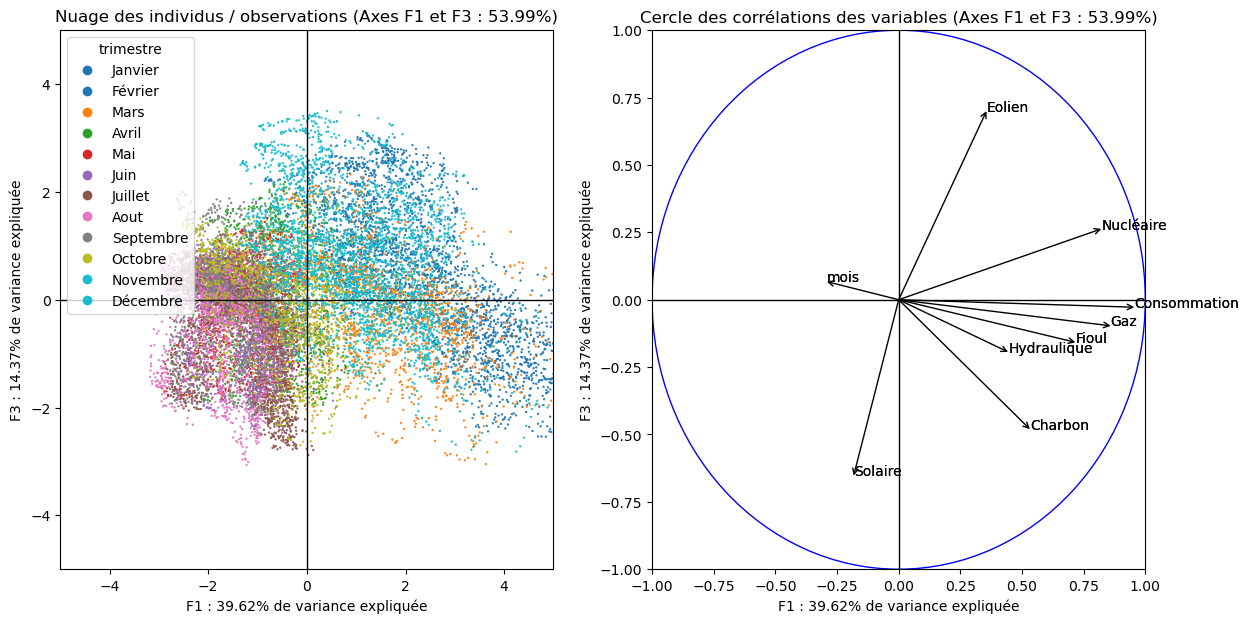

In [36]:
### AXE 1 vs AXE 2

axe1 = 1
axe2 = 3

fig = plt.subplots(figsize=(14,7))

ax1 = plt.subplot(121)

# taille figure
# fig, ax = plt.subplots(figsize=(7,7))
ax1.set_xlim(-5,5) #même limites en abscisse
ax1.set_ylim(-5,5) #et en ordonnée

trimestre_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout','Septembre','Octobre','Novembre','Décembre']

# nuage de points des individus / observations
scatter = plt.scatter(coord[:,axe1-1],coord[:,axe2-1], c=X.mois, cmap='tab10', s=0.4)

# noms des axes et de la figure
ax1.set_title(f"Nuage des individus / observations (Axes F{axe1} et F{axe2} : {round((acp.explained_variance_ratio_[axe1-1]+acp.explained_variance_ratio_[axe2-1])*100,2)}%)", size=12)
ax1.set_xlabel(f"F{axe1} : {round(acp.explained_variance_ratio_[axe1-1]*100,2)}% de variance expliquée", size=10)
ax1.set_ylabel(f"F{axe2} : {round(acp.explained_variance_ratio_[axe2-1]*100,2)}% de variance expliquée", size=10)

#ajouter les axes # a preciser
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)

plt.legend(handles=scatter.legend_elements()[0], 
           labels=trimestre_names,
           title="trimestre")

ax2 = plt.subplot(122)

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(acp.explained_variance_)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))

for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#cercle des corrélations
# Axes 1/3
#fig, ax = plt.subplots(figsize=(8,8))
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,axe1-1],corvar[j,axe2-1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)

# noms des axes et de la figure
ax2.set_title(f"Cercle des corrélations des variables (Axes F{axe1} et F{axe2} : {round((acp.explained_variance_ratio_[axe1-1]+acp.explained_variance_ratio_[axe2-1])*100,2)}%)", size=12)
ax2.set_xlabel(f"F{axe1} : {round(acp.explained_variance_ratio_[axe1-1]*100,2)}% de variance expliquée", size=10)
ax2.set_ylabel(f"F{axe2} : {round(acp.explained_variance_ratio_[axe2-1]*100,2)}% de variance expliquée", size=10)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
ax2.add_artist(cercle) 

# affichage des étiquettes (noms des variables)
from matplotlib.patches import ConnectionPatch

for j in range(p):
    plt.annotate(X.columns[j], (corvar[j, axe1-1], corvar[j, axe2-1]))
    arr = ConnectionPatch((0,0),(corvar[j, axe1-1], corvar[j, axe2-1]),
        coordsA = "data", coordsB = "data",arrowstyle="->")
    ax2.add_artist(arr)

#affichage
plt.show()